In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss,f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_train=pd.read_csv('/content/drive/My Drive/MessagePolarity_ParticipantsData/MessagePolarity_ParticipantsData/Train.csv')
data_test=pd.read_csv('/content/drive/My Drive/MessagePolarity_ParticipantsData/MessagePolarity_ParticipantsData/Test.csv')
data_train.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_13,Freq_Of_Word_14,Freq_Of_Word_15,Freq_Of_Word_16,Freq_Of_Word_17,Freq_Of_Word_18,Freq_Of_Word_19,Freq_Of_Word_20,Freq_Of_Word_21,Freq_Of_Word_22,Freq_Of_Word_23,Freq_Of_Word_24,Freq_Of_Word_25,Freq_Of_Word_26,Freq_Of_Word_27,Freq_Of_Word_28,Freq_Of_Word_29,Freq_Of_Word_30,Freq_Of_Word_31,Freq_Of_Word_32,Freq_Of_Word_33,Freq_Of_Word_34,Freq_Of_Word_35,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_38,Freq_Of_Word_39,Freq_Of_Word_40,Freq_Of_Word_41,Freq_Of_Word_42,Freq_Of_Word_43,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.707520,1.065873,0.953319,-0.132948,-0.291683,0.764765,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,1.312337,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,3.675591,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,15.211013,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,-0.320591,2.030243,-0.307555,1.287387,-0.189867,0.289792,-0.321557,-0.362461,0.128969,-0.191111,3.977893,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,-0.213736,-0.228932,-0.164988,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,-0.320591,-0.635215,-0.307555,-0.184379,-0.189867,-0.333610,-0.321557,-0.362461,-0.973161,-0.191111,-0.707575,-0.132948,-0.291683,-0.197881,-0.331713,-0.298801,0.101269,-0.228932,0.644464,-0.233062,-0.151049,-0.150852,-0.183048,-0.152367,-0.236402,-0.244919,-0.329374,-0.055522,-0.181398,-0.187171,-0.133876,-0.168998,-0.208657,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Freq_Of_Word_1          947 non-null    float64
 1   Freq_Of_Word_2          947 non-null    float64
 2   Freq_Of_Word_3          947 non-null    float64
 3   Freq_Of_Word_4          947 non-null    float64
 4   Freq_Of_Word_5          947 non-null    float64
 5   Freq_Of_Word_6          947 non-null    float64
 6   Freq_Of_Word_7          947 non-null    float64
 7   Freq_Of_Word_8          947 non-null    float64
 8   Freq_Of_Word_9          947 non-null    float64
 9   Freq_Of_Word_10         947 non-null    float64
 10  Freq_Of_Word_11         947 non-null    float64
 11  Freq_Of_Word_12         947 non-null    float64
 12  Freq_Of_Word_13         947 non-null    float64
 13  Freq_Of_Word_14         947 non-null    float64
 14  Freq_Of_Word_15         947 non-null    fl

In [0]:
def check_balancing(data):
  percent=[]
  a=list(data['IsGoodNews'])
  b=data['IsGoodNews'].unique()
  for i in b:
    percent.append(a.count(i)/len(a))
  result=pd.DataFrame({'value':b,'percentage':percent})
  return result  


In [6]:
result=check_balancing(data_train)
print(result)

   value  percentage
0      1    0.388596
1      0    0.611404


In [7]:
y=data_train['IsGoodNews']
x=data_train.drop(['IsGoodNews'],axis=1)
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=0.9,random_state=100)
x_new,y_new=sm.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(x_new.shape,y_new.shape)

(1100, 53) (1100,)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,stratify=y_new,train_size=0.7,random_state=100)

In [9]:
#using SVM
from sklearn import svm
m1=svm.LinearSVC(C=10)
m1.fit(x_train,y_train)
predicted=m1.predict(x_test)
print(accuracy_score(y_test,predicted),confusion_matrix(y_test,predicted),f1_score(y_test,predicted))

0.9151515151515152 [[157  17]
 [ 11 145]] 0.9119496855345912


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
predicted1=kn.predict(x_test)
print(accuracy_score(y_test,predicted1),confusion_matrix(y_test,predicted1),f1_score(y_test,predicted1))

0.8484848484848485 [[140  34]
 [ 16 140]] 0.8484848484848485


In [11]:
#using RFC
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,max_depth=10,criterion='gini')
rfc.fit(x_train,y_train)
predicted2=rfc.predict(x_test)
print(accuracy_score(y_test,predicted2),confusion_matrix(y_test,predicted2),f1_score(y_test,predicted2))

0.9303030303030303 [[169   5]
 [ 18 138]] 0.923076923076923


In [12]:
#using lr
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,max_iter=1000)
lr.fit(x_train,y_train)
predicted3=lr.predict(x_test)
print(accuracy_score(y_test,predicted3),confusion_matrix(y_test,predicted3),f1_score(y_test,predicted3))

0.9333333333333333 [[163  11]
 [ 11 145]] 0.9294871794871795


In [13]:
#using svm
a=[10**x for x in range(-5,1)]
for i in a:
  sgd=SGDClassifier(loss='hinge',penalty='l2',class_weight='balanced',alpha=i)
  sgd.fit(x_train,y_train)
  clf=CalibratedClassifierCV(sgd,method='sigmoid')
  clf.fit(x_train,y_train)
  predicted_proba=clf.predict_proba(x_test)
  predict=sgd.predict(x_test)
  print('for alpha=',i,'accuracy=',accuracy_score(y_test,predict),'f1_score=',f1_score(y_test,predict))

for alpha= 1e-05 accuracy= 0.8545454545454545 f1_score= 0.8571428571428571
for alpha= 0.0001 accuracy= 0.8939393939393939 f1_score= 0.8821548821548821
for alpha= 0.001 accuracy= 0.9151515151515152 f1_score= 0.9113924050632911
for alpha= 0.01 accuracy= 0.9212121212121213 f1_score= 0.9161290322580644
for alpha= 0.1 accuracy= 0.9151515151515152 f1_score= 0.9090909090909091
for alpha= 1 accuracy= 0.8818181818181818 f1_score= 0.8695652173913043


In [14]:
#using lr
a=[10**x for x in range(-5,1)]
for i in a:
  sgd=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=i)
  sgd.fit(x_train,y_train)
  clf=CalibratedClassifierCV(sgd,method='sigmoid')
  clf.fit(x_train,y_train)
  predicted_proba=clf.predict_proba(x_test)
  predict=sgd.predict(x_test)
  print('for alpha=',i,'accuracy=',accuracy_score(y_test,predict),'f1_score=',f1_score(y_test,predict))

for alpha= 1e-05 accuracy= 0.8727272727272727 f1_score= 0.8703703703703703
for alpha= 0.0001 accuracy= 0.8818181818181818 f1_score= 0.8835820895522388
for alpha= 0.001 accuracy= 0.9212121212121213 f1_score= 0.9182389937106918
for alpha= 0.01 accuracy= 0.9272727272727272 f1_score= 0.922077922077922
for alpha= 0.1 accuracy= 0.9212121212121213 f1_score= 0.9161290322580644
for alpha= 1 accuracy= 0.8909090909090909 f1_score= 0.8831168831168831


In [96]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3,min_child_weight=9,gamma=3,n_estimators=2000,reg_lambda=0,learning_rate=0.4,subsample=0.9)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3,
              learning_rate=0.4, max_delta_step=0, max_depth=3,
              min_child_weight=9, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [97]:
predict=xgb.predict(x_test)
print('accuracy=',accuracy_score(y_test,predict),'f1_score=',f1_score(y_test,predict))

accuracy= 0.9393939393939394 f1_score= 0.9342105263157894


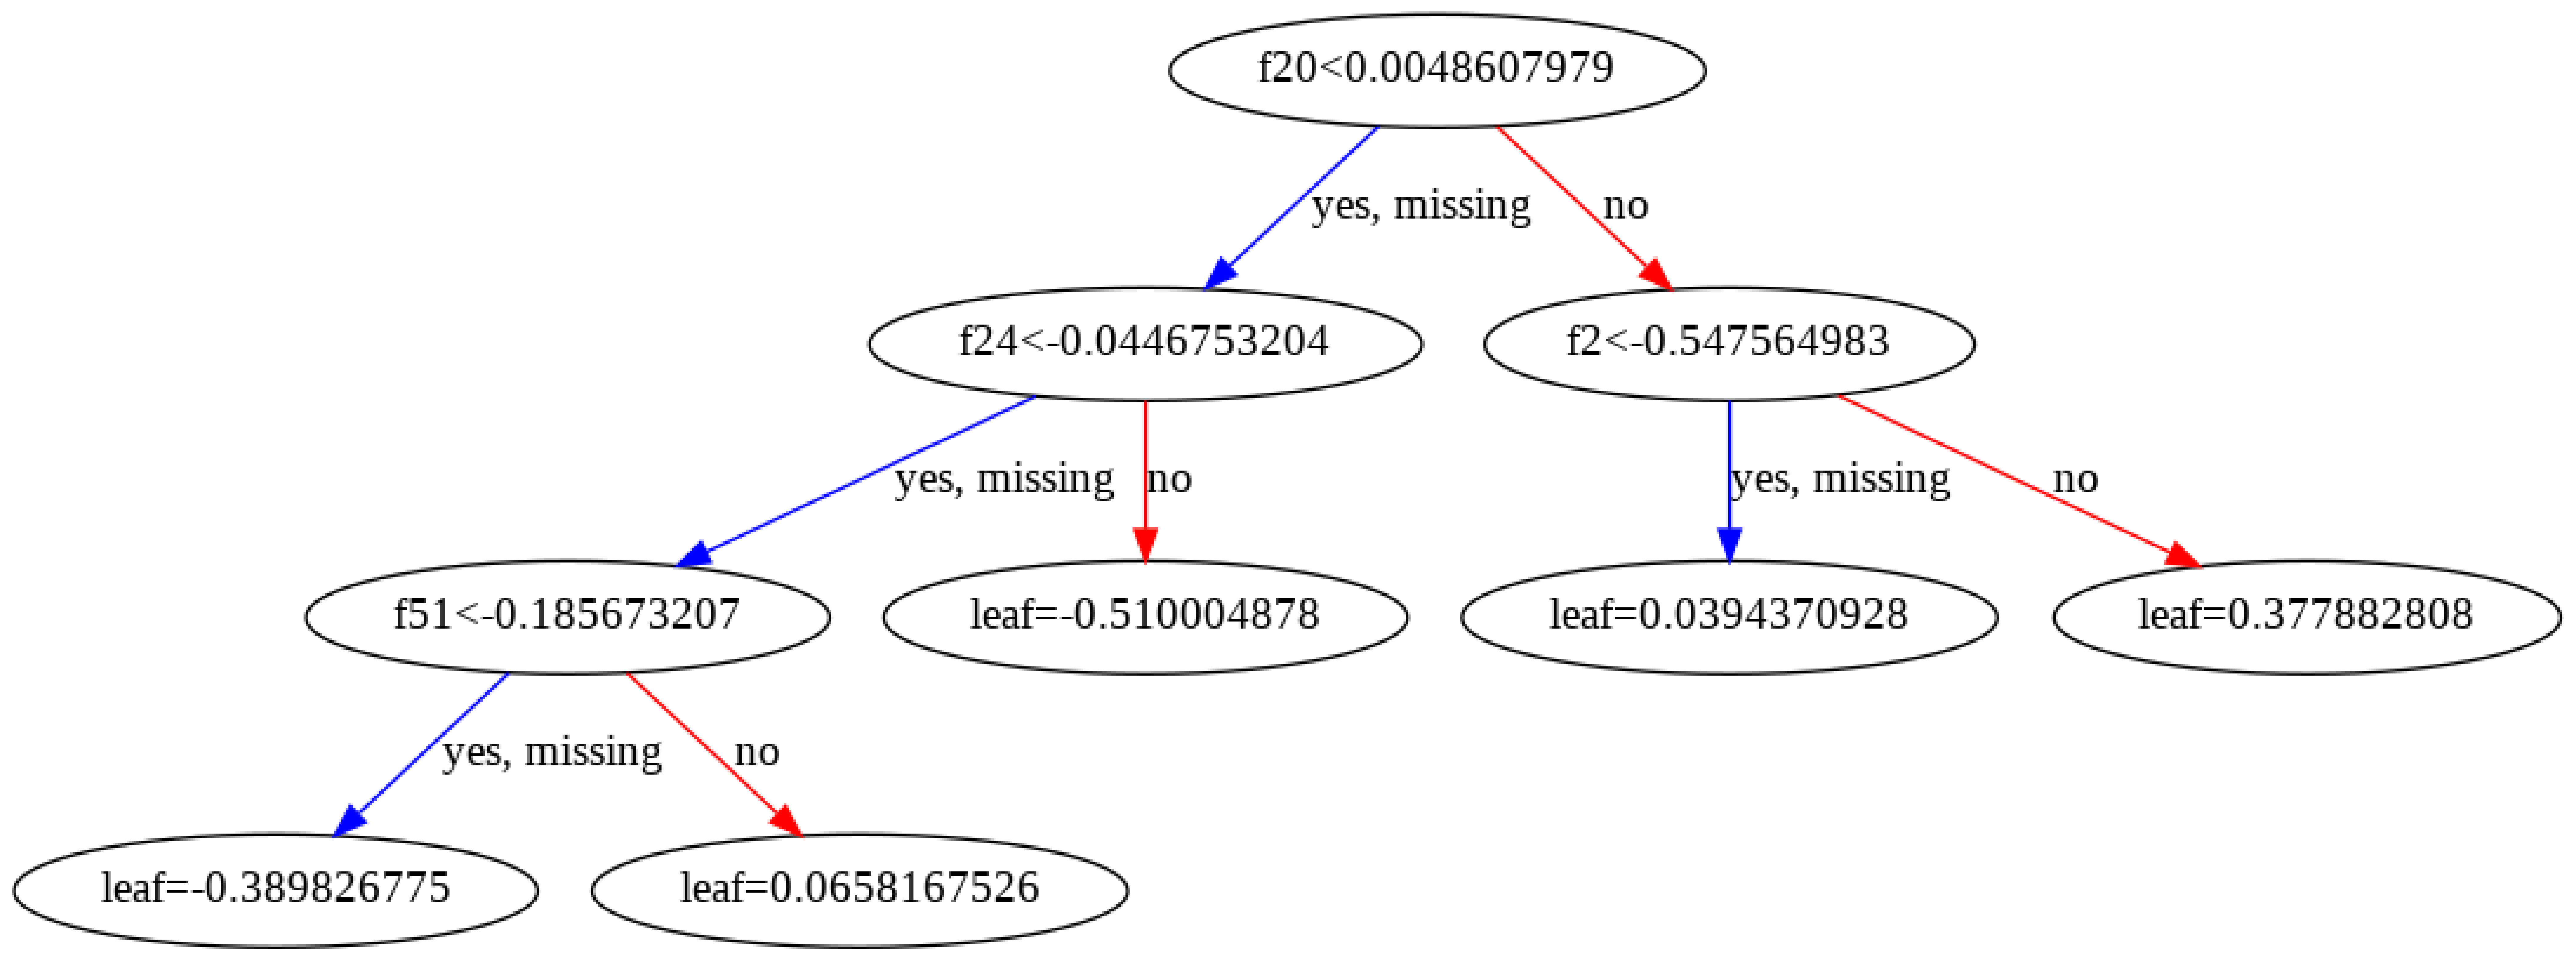

In [98]:
from xgboost import plot_tree
plot_tree(xgb, num_trees=4)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

In [0]:
sgd=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',alpha=0.01)
sgd.fit(x_train,y_train)
clf=CalibratedClassifierCV(sgd,method='sigmoid')
clf.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Freq_Of_Word_1          527 non-null    float64
 1   Freq_Of_Word_2          527 non-null    float64
 2   Freq_Of_Word_3          527 non-null    float64
 3   Freq_Of_Word_4          527 non-null    float64
 4   Freq_Of_Word_5          527 non-null    float64
 5   Freq_Of_Word_6          527 non-null    float64
 6   Freq_Of_Word_7          527 non-null    float64
 7   Freq_Of_Word_8          527 non-null    float64
 8   Freq_Of_Word_9          527 non-null    float64
 9   Freq_Of_Word_10         527 non-null    float64
 10  Freq_Of_Word_11         527 non-null    float64
 11  Freq_Of_Word_12         527 non-null    float64
 12  Freq_Of_Word_13         527 non-null    float64
 13  Freq_Of_Word_14         527 non-null    float64
 14  Freq_Of_Word_15         527 non-null    fl

In [0]:
predicted=m1.predict(data_test)


In [0]:
result=pd.DataFrame({'IsGoodNews':predicted})

In [0]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IsGoodNews  527 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [0]:
result.to_excel('predicted_polarity.xlsx',index=False)